# 任务6.3 构建并评价分类模型

## 6.3.1 使用sklearn 估计器构建分类模型

### 代码6-17 使用sklearn估计器构建SVM模型
在数据分析领域，分类算法有很多，其原理千差万别，有基于样本距离的最近邻算法，有基于特征信息熵的<mark style=background-color:yellow>决策树</mark>，有基于bagging的<mark style=background-color:yellow>随机森林</mark> ，有基于boosting的梯度提升<mark style=background-color:yellow>分类树</mark> ，但其实现的过程相差不大。过程如图所示。


In [1]:
%%html
<img style="float: left;" src="./image/6-17.png" width=300 height=400>

### sklearn 库常用分类算法函数
sklearn中提供的分类算法非常多，分别存在于不同的模块中。常用的分类算法如下表所示。


In [2]:
%%html
<img style="float: left;" src="./image/6-17-2.png" width=400 height=400>

In [3]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split#划分数据
from sklearn.preprocessing import StandardScaler    #标准差
cancer = load_breast_cancer()
cancer_data = cancer['data']
cancer_target = cancer['target']
cancer_names = cancer['feature_names']
## 将数据划分为训练集测试集
cancer_data_train,cancer_data_test, \
cancer_target_train,cancer_target_test = \
train_test_split(cancer_data,cancer_target,
      test_size = 0.2,random_state = 22)
## 数据标准化
stdScaler = StandardScaler().fit(cancer_data_train)
cancer_trainStd = stdScaler.transform(cancer_data_train)
cancer_testStd = stdScaler.transform(cancer_data_test)
## 建立SVM模型
svm = SVC().fit(cancer_trainStd,cancer_target_train)
print('建立的SVM模型为：\n',svm)

# 预测训练结果
cancer_target_pred = svm.predict(cancer_testStd)
print('预测前20个结果为: \n',cancer_target_pred[:20])

建立的SVM模型为：
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
预测前20个结果为: 
 [1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1]


### 代码 6-18 分类结果的混淆矩阵与准确率

In [4]:
true = np.sum(cancer_target_pred == cancer_target_test)
print('预测对的结果数目为：', true)
print('预测错的的结果数目为：', cancer_target_test.shape[0]-true)
print('预测结果准确率为：', true/cancer_target_test.shape[0])

预测对的结果数目为： 111
预测错的的结果数目为： 3
预测结果准确率为： 0.9736842105263158


SVM模型预测结果的准确率约为97.4%,只有3个测试样本识别错误,说明了整体模型效果理想

## 6.3.2 评价分类模型
分类模型对测试集进行预测而得出的准确率并不能很好地反映模型的性能，为了有效判断一个预测模型的性能表现，需要结合真实值，计算出精确率、召回率、F1值和Cohen’s Kappa系数等指标来衡量。常规分类模型的评价指标如表所示。分类模型评价方法前4种都是分值越高越好，其使用方法基本相同。
sklearn的metrics模块还提供了一个能够输出分类模型评价报告的函数classfication_report。

In [5]:
%%html
<img style="float: left;" src="./image/6-19.png" width=600 height=400>

### 代码6-19 分类模型常用评价方法 

In [6]:
from sklearn.metrics import accuracy_score,precision_score, \
recall_score,f1_score,cohen_kappa_score
print('使用SVM预测breast_cancer数据的准确率为：',
      accuracy_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的精确率为：',
      precision_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的召回率为：',
      recall_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的F1值为：',
      f1_score(cancer_target_test,cancer_target_pred))
print('使用SVM预测breast_cancer数据的Cohen’s Kappa系数为：',
      cohen_kappa_score(cancer_target_test,cancer_target_pred))

使用SVM预测breast_cancer数据的准确率为： 0.9736842105263158
使用SVM预测breast_cancer数据的精确率为： 0.9594594594594594
使用SVM预测breast_cancer数据的召回率为： 1.0
使用SVM预测breast_cancer数据的F1值为： 0.9793103448275862
使用SVM预测breast_cancer数据的Cohen’s Kappa系数为： 0.9432082364662903


### 代码6-20 分类模型评价报告

In [8]:
from sklearn.metrics import classification_report
print('使用SVM预测iris数据的分类报告:','\n',
     classification_report(cancer_target_test,
                          cancer_target_pred))

使用SVM预测iris数据的分类报告: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### 代码6-21 绘制ROC曲线

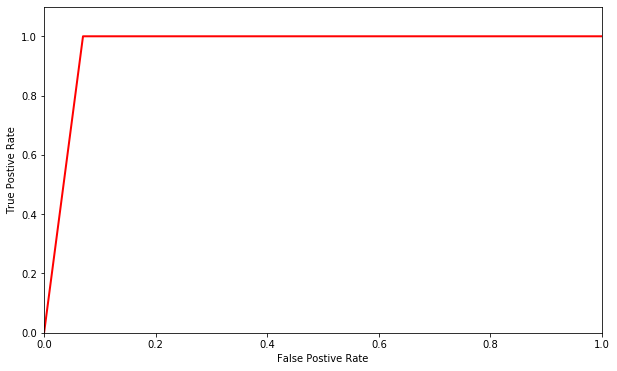

In [10]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
## 求出ROC曲线的x轴和y轴
fpr ,tpr ,thresholds = \
roc_curve(cancer_target_test,cancer_target_pred)
plt.figure(figsize=(10,6))
plt.xlim(0,1)  ##设定x轴的范围
plt.ylim(0.0,1.1)  # 设定y轴的范围
plt.xlabel('False Postive Rate') #伪阳性率
plt.ylabel('True Postive Rate')  #真阳性率
plt.plot(fpr,tpr,linewidth=2,linestyle='-',color='red')
plt.show()

### ROC曲线
除了使用数值，表格形式评估分类模型的性能，还可通过绘制ROC曲线的方式来评估分类模型。
ROC曲线横纵坐标范围为[0,1]，通常情况下ROC曲线与X轴形成的面积越大，表示模型性能越好。但是当ROC曲线处于下图中蓝色虚线的位置，就表明了模型的计算结果基本都是随机得来的，在此种情况下模型起到的作用几乎为零。故在实际中ROC曲线离图中蓝色虚线越远表示模型效果越好。

## 6.3.3 任务实现
常规的鲍鱼的年龄是通过显微镜查看切割,染色后的外壳上环的数量得到的,十分耗时.一些常规的物理量(如性别,长度,宽度,壳体重量等)的测量十分容易获取,若能够使用这些物理量预测年龄,将节省大量时间
#### 使用sklearn构建鲍鱼年龄预测的步骤如下

### 1 构建SVM分类模型
### 代码 6-22 鲍鱼年龄预测

In [21]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
abalone = pd.read_csv('../data/abalone.data',sep=',')
# 将数据和标签拆开
abalone_data = abalone.iloc[:,:8]
abalone_target = abalone.iloc[:,8]
#连续型特征离散化
sex = pd.get_dummies(abalone_data['sex'])
abalone_data = pd.concat([abalone_data,sex],axis=1)
abalone_data.drop('sex',axis = 1,inplace =True)
# 划分训练集,测试集
abalone_train,abalone_test,\
abalone_target_train,abalone_target_test = \
train_test_split(abalone_data,abalone_target,
                train_size = 0.8,random_state = 42)
# 标准化
stdScaler = StandardScaler().fit(abalone_train)
abalone_std_train = stdScaler.transform(abalone_train)
abalone_std_test = stdScaler.transform(abalone_test)
## 建模
svm_abalone = SVC().fit(abalone_std_train,abalone_target_train)
print('建立的SVM模型为：','\n',svm_abalone)

建立的SVM模型为： 
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### 2. 评价构建的SVM分类模型
### 代码 6-23 评价构建的SVM分类模型
代码6-23 的结果显示了本次模型每个类别的精确率,召回率和F1值,其中除了对鲍鱼年龄为4的预测结果较好外,其他的预测结果欠佳,后期还需要仔细调整

In [22]:
abalone_target_pred = svm_abalone.predict(abalone_std_test)
print('abalone数据集的SVM分类报告为: \n',
     classification_report(abalone_target_test,abalone_target_pred))

abalone数据集的SVM分类报告为: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.45      0.69      0.55        13
           5       0.54      0.22      0.31        32
           6       0.40      0.33      0.36        48
           7       0.41      0.44      0.42        84
           8       0.37      0.36      0.37        99
           9       0.28      0.57      0.38       142
          10       0.24      0.33      0.28       139
          11       0.25      0.25      0.25        93
          12       0.00      0.00      0.00        51
          13       0.00      0.00      0.00        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
    

D:\Study\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
